In [1]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
from AntColony import AntColonyOptimization
np.random.seed(7)
random.seed(7)

In [2]:
# Carregar a matriz de adjacência
with open('matriz_de_adjacência.json', 'r') as file:
    matriz = json.load(file)

display(matriz)

[[0, 20, 0, 0, 0, 0, 0, 29, 0, 0, 0, 29, 37, 0, 0, 0, 0, 0],
 [20, 0, 25, 0, 0, 0, 0, 28, 0, 0, 0, 39, 0, 0, 0, 0, 0, 0],
 [0, 25, 0, 25, 0, 0, 0, 30, 0, 0, 0, 29, 54, 0, 0, 0, 0, 0],
 [0, 0, 25, 0, 39, 32, 42, 0, 23, 33, 0, 0, 0, 56, 0, 0, 0, 0],
 [0, 0, 0, 39, 0, 12, 26, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 32, 12, 0, 17, 0, 0, 35, 30, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 42, 26, 17, 0, 0, 0, 0, 38, 0, 0, 0, 0, 0, 0, 0],
 [29, 28, 30, 0, 0, 0, 0, 0, 0, 0, 0, 25, 22, 0, 0, 0, 0, 0],
 [0, 0, 0, 23, 0, 0, 0, 0, 0, 26, 0, 0, 34, 0, 0, 43, 0, 0],
 [0, 0, 0, 33, 19, 0, 0, 0, 26, 0, 24, 0, 0, 30, 19, 0, 0, 0],
 [0, 0, 0, 0, 0, 30, 38, 0, 0, 10, 0, 0, 0, 0, 26, 0, 0, 36],
 [29, 39, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 27, 0, 0, 43, 0, 0],
 [37, 0, 54, 0, 0, 0, 0, 22, 34, 0, 0, 27, 0, 24, 0, 19, 0, 0],
 [0, 0, 0, 56, 0, 0, 0, 0, 0, 30, 0, 0, 24, 0, 20, 19, 17, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 26, 0, 0, 20, 0, 0, 18, 21],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 19, 19, 0, 0, 26, 0],
 [0, 0, 

In [3]:
# Número de cidades
n_cidades = len(matriz)
print(n_cidades)

18


In [4]:
# Algoritmo de Floyd-Warshall
def floyd_warshall(matriz):
    n = len(matriz)
    dist = [[float('inf')] * n for _ in range(n)]
    for i in range(n):
        dist[i][i] = 0
        for j in range(n):
            if matriz[i][j] != 0:
                dist[i][j] = matriz[i][j]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] != float('inf') and dist[k][j] != float('inf'):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist

# Aplicar Floyd-Warshall à matriz
matriz_completa = floyd_warshall(matriz)
display(matriz_completa)

[[0, 20, 45, 70, 109, 102, 112, 29, 71, 91, 107, 29, 37, 61, 81, 56, 78, 93],
 [20, 0, 25, 50, 89, 82, 92, 28, 73, 83, 107, 39, 50, 74, 94, 69, 91, 106],
 [45, 25, 0, 25, 64, 57, 67, 30, 48, 58, 82, 29, 52, 76, 77, 71, 93, 98],
 [70, 50, 25, 0, 39, 32, 42, 55, 23, 33, 57, 54, 57, 56, 52, 66, 70, 73],
 [109, 89, 64, 39, 0, 12, 26, 94, 45, 19, 42, 93, 73, 49, 38, 68, 56, 59],
 [102, 82, 57, 32, 12, 0, 17, 87, 55, 31, 30, 86, 85, 61, 50, 80, 68, 66],
 [112, 92, 67, 42, 26, 17, 0, 97, 65, 45, 38, 96, 99, 75, 64, 94, 82, 74],
 [29, 28, 30, 55, 94, 87, 97, 0, 56, 76, 92, 25, 22, 46, 66, 41, 63, 78],
 [71, 73, 48, 23, 45, 55, 65, 56, 0, 26, 50, 61, 34, 56, 45, 43, 63, 66],
 [91, 83, 58, 33, 19, 31, 45, 76, 26, 0, 24, 81, 54, 30, 19, 49, 37, 40],
 [101, 93, 68, 43, 29, 30, 38, 86, 36, 10, 0, 91, 64, 40, 26, 59, 44, 36],
 [29, 39, 55, 80, 100, 112, 122, 25, 61, 81, 97, 0, 27, 51, 71, 43, 68, 83],
 [37, 50, 52, 57, 73, 85, 99, 22, 34, 54, 70, 27, 0, 24, 44, 19, 41, 56],
 [61, 74, 76, 56, 49, 61,

Colônia de Formigas:
Melhor rota: [0, 1, 2, 3, 8, 9, 4, 5, 6, 10, 14, 17, 16, 13, 15, 12, 7, 11]
Distância: 398
Tempo de execução: 1.7084 segundos


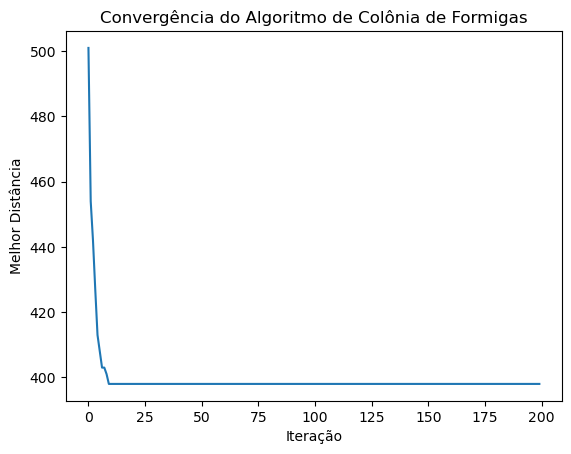

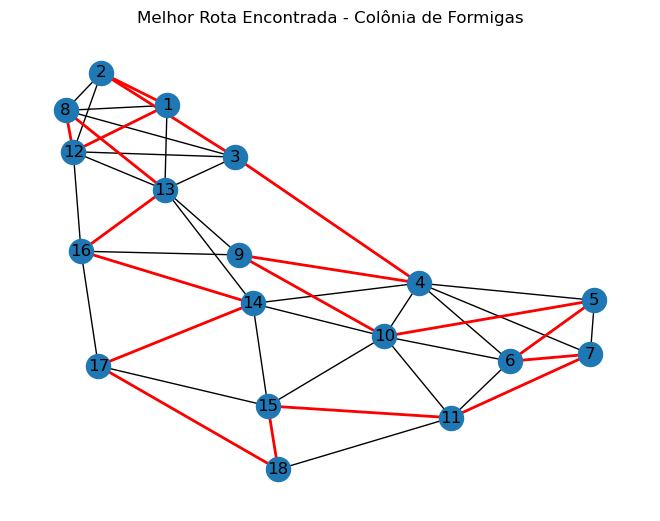

In [5]:
# Executar ACO
aco = AntColonyOptimization(matriz_completa, matriz, n_cidades, n_formigas=50, max_iter=200)
melhor_rota_aco, melhor_distancia_aco, historico_aco, tempo_aco = aco.run()

print("Colônia de Formigas:")
print(f"Melhor rota: {melhor_rota_aco}")
print(f"Distância: {melhor_distancia_aco}")
print(f"Tempo de execução: {tempo_aco:.4f} segundos")

# Visualizar convergência
aco.plot_convergence(historico_aco)

# Visualizar rota
aco.plot_route(melhor_rota_aco)

Run: 0
Run: 1
Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10
Run: 11
Run: 12
Run: 13
Run: 14
Run: 15
Run: 16
Run: 17
Run: 18
Run: 19
Run: 20
Run: 21
Run: 22
Run: 23
Run: 24
Run: 25
Run: 26
Run: 27
Run: 28
Run: 29
Run: 30
Run: 31
Run: 32
Run: 33
Run: 34
Run: 35
Run: 36
Run: 37
Run: 38
Run: 39
Run: 40
Run: 41
Run: 42
Run: 43
Run: 44
Run: 45
Run: 46
Run: 47
Run: 48
Run: 49
\nResultados do ACO (média de 50 rodadas):
Distância Média: 398.12 \pm 0.59
Tempo Médio: 1.7508 \pm 0.0236 segundos
Iterações Médias: 10.10 \pm 11.61
Índice do representante ACO: 0, Distância: 398.00


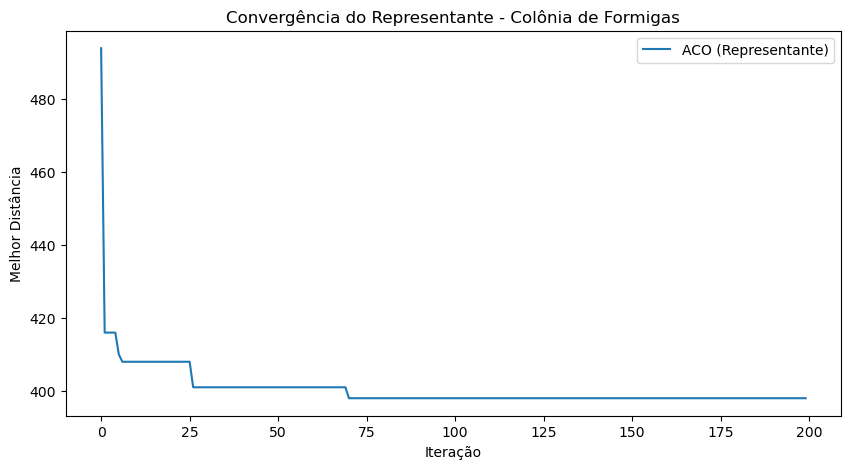

Rota ACO (Representante): [ 1  2  3  4  9 10  5  6  7 11 15 18 17 14 16 13  8 12]


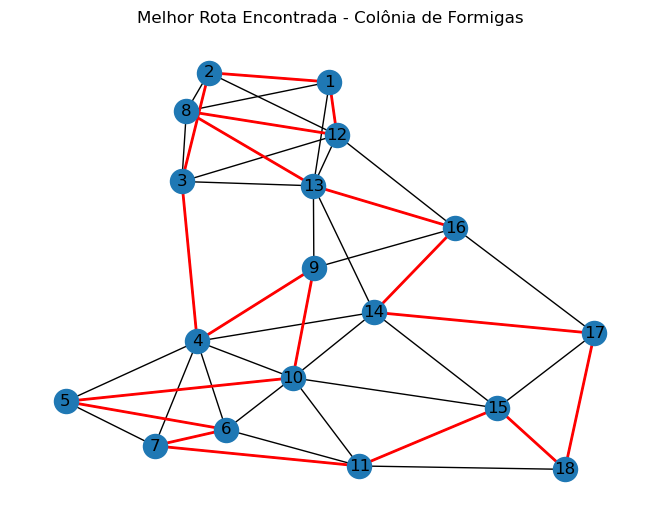

In [6]:
def compare_aco(matriz_completa, matriz_original, n_cidades, num_runs=50, n_formigas=50, max_iter=200):
    results_aco = {'distances': [], 'times': [], 'historicos': [], 'iter_at_best': [], 'best_routes': []}

    for run in range(num_runs):
        print(f'Run: {run}')
        # Executar ACO
        aco = AntColonyOptimization(matriz_completa, matriz_original, n_cidades, n_formigas=n_formigas, max_iter=max_iter)
        melhor_rota_aco, melhor_distancia_aco, historico_aco, tempo_aco = aco.run()
        
        # Armazenar resultados
        results_aco['distances'].append(melhor_distancia_aco)
        results_aco['times'].append(tempo_aco)
        results_aco['historicos'].append(historico_aco)
        # Encontrar a iteração da melhor distância
        iter_at_best_aco = np.argmin(historico_aco)
        results_aco['iter_at_best'].append(iter_at_best_aco)
        results_aco['best_routes'].append(melhor_rota_aco.copy())  # Armazenar a melhor rota

    # Análise
    avg_distance_aco = np.mean(results_aco['distances'])
    std_distance_aco = np.std(results_aco['distances'])
    
    avg_time_aco = np.mean(results_aco['times'])
    std_time_aco = np.std(results_aco['times'])
    
    avg_iter_aco = np.mean(results_aco['iter_at_best'])
    std_iter_aco = np.std(results_aco['iter_at_best'])

    # Encontrar o índice do histórico mais próximo da média
    idx_aco = np.argmin(np.abs(np.array(results_aco['distances']) - avg_distance_aco))
    historico_aco_representante = results_aco['historicos'][idx_aco]
    melhor_rota_aco_representante = results_aco['best_routes'][idx_aco]

    # Imprimir resultados
    print(rf"\nResultados do ACO (média de {num_runs} rodadas):")
    print(rf"Distância Média: {avg_distance_aco:.2f} \pm {std_distance_aco:.2f}")
    print(rf"Tempo Médio: {avg_time_aco:.4f} \pm {std_time_aco:.4f} segundos")
    print(rf"Iterações Médias: {avg_iter_aco:.2f} \pm {std_iter_aco:.2f}")
    print(rf"Índice do representante ACO: {idx_aco}, Distância: {results_aco['distances'][idx_aco]:.2f}")

    # Visualizar convergência do representante
    aco = AntColonyOptimization(matriz_completa, matriz_original, n_cidades, n_formigas=n_formigas, max_iter=max_iter)
    plt.figure(figsize=(10, 5))
    plt.plot(historico_aco_representante, label='ACO (Representante)')
    plt.xlabel('Iteração')
    plt.ylabel('Melhor Distância')
    plt.title('Convergência do Representante - Colônia de Formigas')
    plt.legend()
    plt.savefig('Representante_ACO_Q1.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()

    # Visualizar a rota do representante
    print(f'Rota ACO (Representante): {np.array(melhor_rota_aco_representante) +1}')
    aco.plot_route(melhor_rota_aco_representante)

    return results_aco

# Executar o comparativo
results_aco = compare_aco(matriz_completa, matriz, n_cidades, num_runs=50, n_formigas=50, max_iter=200)